# KNN - Bitcoin - Resolución de Ejercicio

***

#### Ejercicio:

Aplicar KNN para detectar patrones de tendencia en Bitcoin:

1. En un dataset de valoraciones de Bitcoin, obtener 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días.

2. Buscar en la gráfica 3 fechas de clara tendencia alcista y 3 de bajista.

3. Crear un dataset de entrenamiento con las 6 fechas encontradas y las 5 columnas de deltas.

4. Entrenar KNN con este dataset de entrenamiento.

5. Aplica predicción de KNN para determinar la tendencia alcista/bajista en una fecha dada sobre el dataset completo.

6. Dibuja los valores alcistas de Bitcoin en color azul

7. Dibuja los valores bajistas de Bitcoin en color rojo

***

In [112]:
import pandas as pd

# Leo en un dataframe las valoraciones de Bitcoin
btc = pd.read_csv("bitcoin1000.csv")
btc

,time,price
0,"Aug 17, 2017 04:00:00",4261.48
1,"Aug 17, 2017 04:15:00",4261.48
2,"Aug 17, 2017 04:30:00",4280.00
3,"Aug 17, 2017 04:45:00",4310.07
4,"Aug 17, 2017 05:00:00",4308.83
...,...,...
995,"Aug 27, 2017 12:45:00",4319.66
996,"Aug 27, 2017 13:00:00",4314.11
997,"Aug 27, 2017 13:15:00",4285.54
998,"Aug 27, 2017 13:30:00",4326.34


Creamos índice con las fechas

In [113]:
# Convertir la columna de fecha a tipo de datos fecha
btc['time'] = pd.to_datetime(btc['time'])

# Establecer la columna de fecha como índice
btc.set_index('time', inplace=True)

btc

,price
time,
2017-08-17 04:00:00,4261.48
2017-08-17 04:15:00,4261.48
2017-08-17 04:30:00,4280.00
2017-08-17 04:45:00,4310.07
2017-08-17 05:00:00,4308.83
...,...
2017-08-27 12:45:00,4319.66
2017-08-27 13:00:00,4314.11
2017-08-27 13:15:00,4285.54


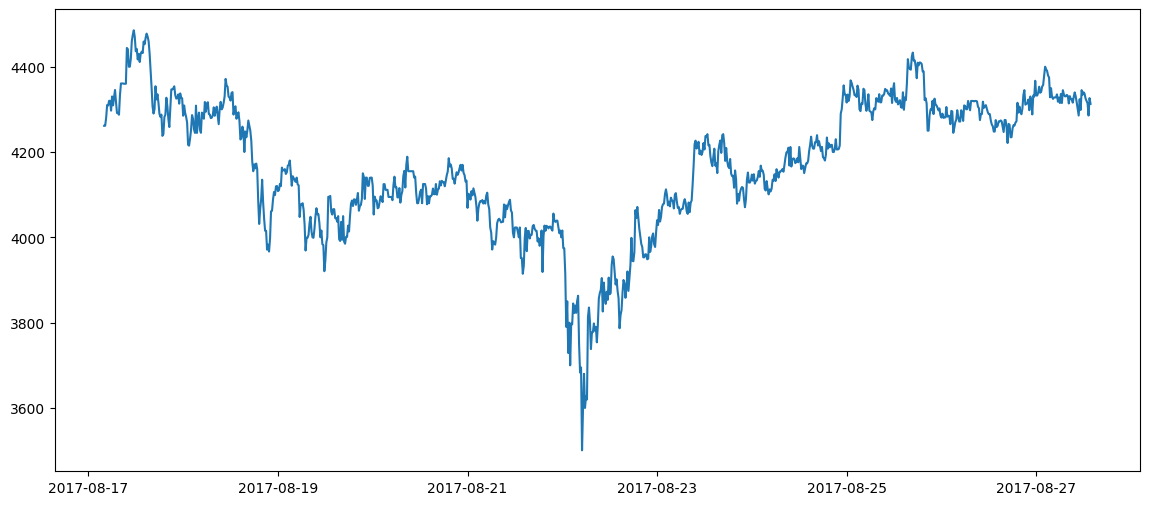

In [114]:
import matplotlib.pyplot as plt

# Forzar gráficos anchos en el notebook de Jupyter
plt.rcParams["figure.figsize"] = (14, 6) # (w, h)

plt.plot(btc)

<AxesSubplot: xlabel='time'>

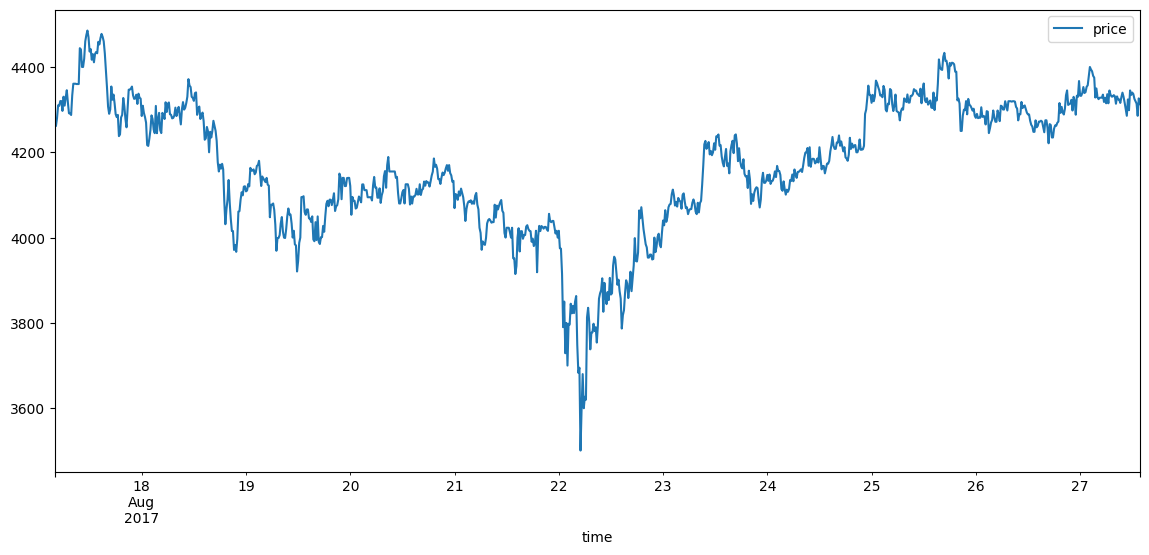

In [115]:
# Usando el método plot de dataframe las fechas del eje se ven mejor
btc.plot()

***

#### En un dataset de valoraciones de Bitcoin, obtener 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días.

In [116]:
# Crear 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días
for i in range(1, 6):
    btc[f'delta_{i}d'] = btc['price'].diff(periods=i)

btc

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2017-08-17 04:00:00,4261.48,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:15:00,4261.48,0.00,NaN,NaN,NaN,NaN
2017-08-17 04:30:00,4280.00,18.52,18.52,NaN,NaN,NaN
2017-08-17 04:45:00,4310.07,30.07,48.59,48.59,NaN,NaN
2017-08-17 05:00:00,4308.83,-1.24,28.83,47.35,47.35,NaN
...,...,...,...,...,...,...
2017-08-27 12:45:00,4319.66,-5.52,-16.84,-20.34,-14.72,-25.31
2017-08-27 13:00:00,4314.11,-5.55,-11.07,-22.39,-25.89,-20.27
2017-08-27 13:15:00,4285.54,-28.57,-34.12,-39.64,-50.96,-54.46


<AxesSubplot: xlabel='time'>

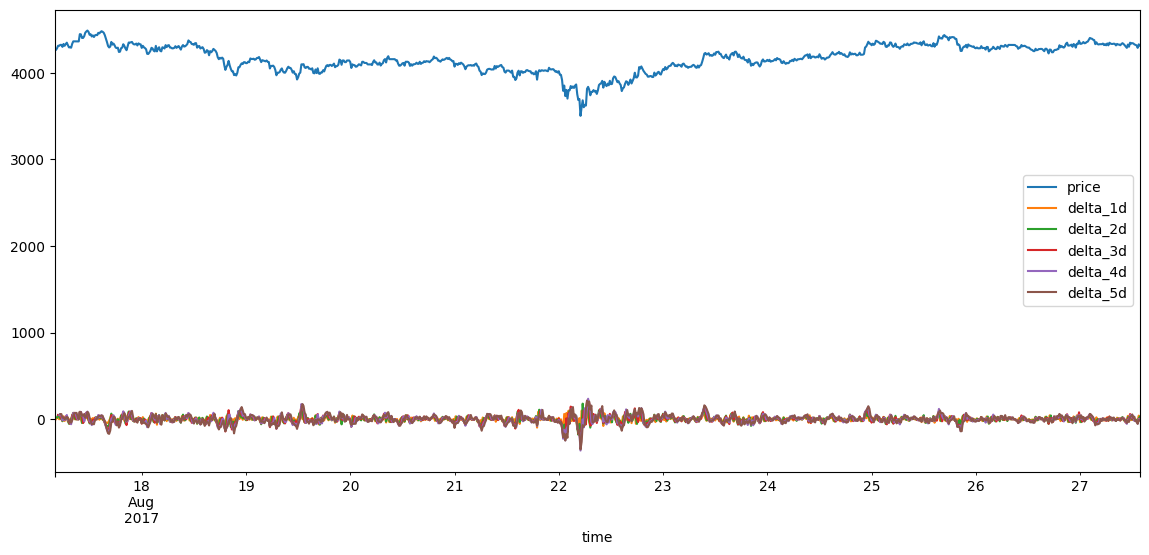

In [117]:
btc.plot()

La valoración tan alta de BTC eclipsa los deltas. Graficamos sólo los deltas:

<AxesSubplot: xlabel='time'>

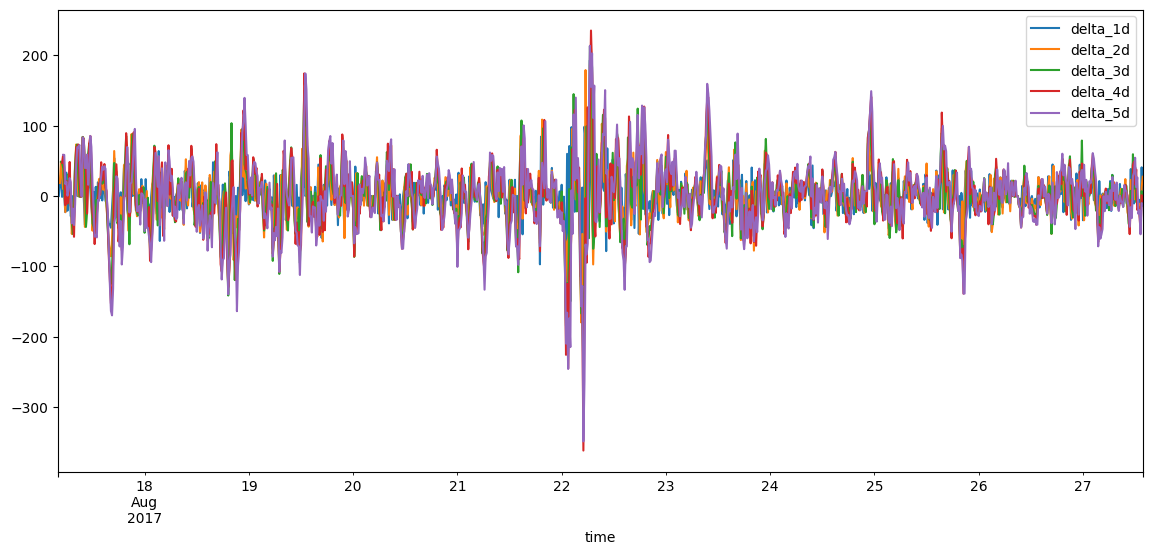

In [118]:
btc[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].plot()

Graficamos los deltas de forma comparativa con espaciados constantes

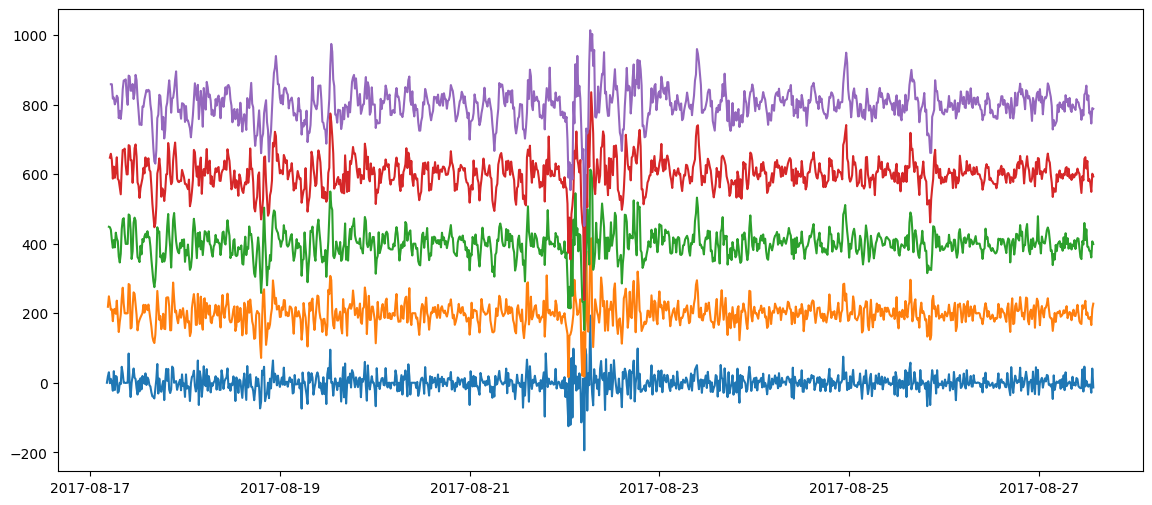

In [144]:
plt.plot(btc[['delta_1d']])
plt.plot(btc[['delta_2d']] + 200)
plt.plot(btc[['delta_3d']] + 400)
plt.plot(btc[['delta_4d']] + 600)
plt.plot(btc[['delta_5d']] + 800)
plt.show()

Descubriendo zonas de mayor volatilidad, mediante moving average

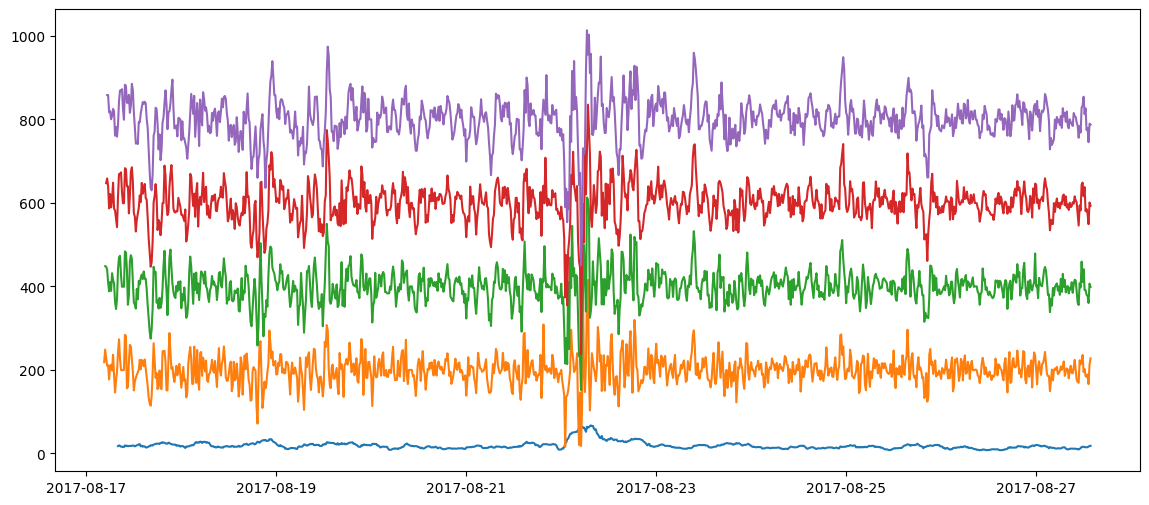

In [148]:
plt.plot(abs(btc[['delta_1d']]).rolling(window=16).mean())
plt.plot(btc[['delta_2d']] + 200)
plt.plot(btc[['delta_3d']] + 400)
plt.plot(btc[['delta_4d']] + 600)
plt.plot(btc[['delta_5d']] + 800)
plt.show()

Análisis de correlación de los deltas

In [149]:
btc[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr()

,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
delta_1d,1.000000,0.640475,0.552882,0.472944,0.415573
delta_2d,0.640475,1.000000,0.759912,0.670820,0.588197
delta_3d,0.552882,0.759912,1.000000,0.816874,0.734427
delta_4d,0.472944,0.670820,0.816874,1.000000,0.848865
delta_5d,0.415573,0.588197,0.734427,0.848865,1.000000


<AxesSubplot: >

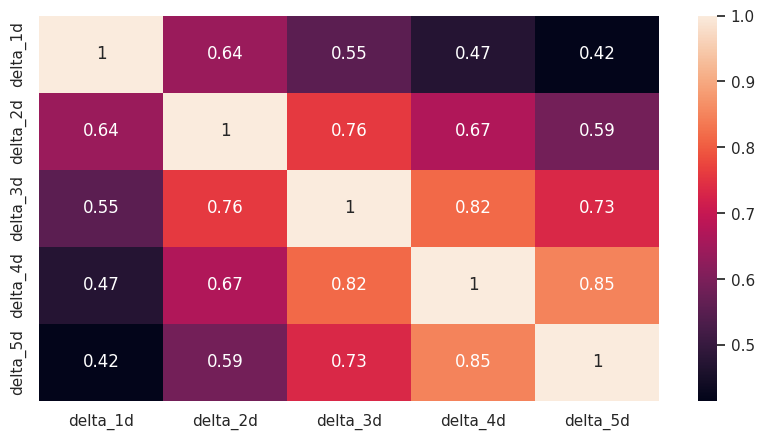

In [152]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(btc[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']].corr(), annot=True)

***

#### Buscar en la gráfica 3 fechas de clara tendencia alcista y 3 de bajista.

Alcista: 

In [119]:
# Buscar las 3 fechas con el mayor delta_5d, ordenando por esta columna
btc_sorted = btc.sort_values(by='delta_5d', ascending=False)
btc_sorted[:3]

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2017-08-22 06:30:00,3813.12,193.17,186.13,213.12,133.12,213.67
2017-08-22 07:00:00,3803.00,-32.44,-10.12,183.05,176.01,203.00
2017-08-19 13:00:00,4095.00,0.00,95.04,107.29,149.88,174.41


In [120]:
# Buscar las 3 fechas con el menor delta_5d
btc_sorted[-8:]

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2017-08-22 01:30:00,3728.91,-121.08,-61.09,-186.09,-245.14,-246.09
2017-08-22 05:15:00,3599.45,98.65,-95.54,-83.58,-149.55,-263.55
2017-08-22 05:00:00,3500.80,-194.19,-182.23,-248.20,-362.20,-349.18
2017-08-17 04:00:00,4261.48,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:15:00,4261.48,0.00,NaN,NaN,NaN,NaN
2017-08-17 04:30:00,4280.00,18.52,18.52,NaN,NaN,NaN
2017-08-17 04:45:00,4310.07,30.07,48.59,48.59,NaN,NaN
2017-08-17 05:00:00,4308.83,-1.24,28.83,47.35,47.35,NaN


***

#### Crear un dataset de entrenamiento con las 6 fechas encontradas y las 5 columnas de deltas.

In [121]:
# Quito los NaN's
btc_sorted = btc_sorted.dropna()
btc_sorted

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2017-08-22 06:30:00,3813.12,193.17,186.13,213.12,133.12,213.67
2017-08-22 07:00:00,3803.00,-32.44,-10.12,183.05,176.01,203.00
2017-08-19 13:00:00,4095.00,0.00,95.04,107.29,149.88,174.41
2017-08-23 09:30:00,4218.61,50.60,94.73,132.42,137.61,159.61
2017-08-22 07:30:00,3777.05,38.99,-25.95,-58.39,-36.07,157.10
...,...,...,...,...,...,...
2017-08-22 01:00:00,3790.00,-125.00,-184.05,-185.00,-226.00,-210.00
2017-08-22 02:00:00,3700.00,-99.97,-28.91,-149.99,-90.00,-215.00
2017-08-22 01:30:00,3728.91,-121.08,-61.09,-186.09,-245.14,-246.09


In [122]:
# Dejo sólo las 3 primeras filas y las 3 últimas
# Obtener las 3 primeras filas
btc_sorted_head = btc_sorted.head(3)

# Obtener las 3 últimas filas
btc_sorted_tail = btc_sorted.tail(3)

# Concatenar las primeras y últimas filas
dfTraining = pd.concat([btc_sorted_head, btc_sorted_tail])

dfTraining

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d
time,,,,,,
2017-08-22 06:30:00,3813.12,193.17,186.13,213.12,133.12,213.67
2017-08-22 07:00:00,3803.00,-32.44,-10.12,183.05,176.01,203.00
2017-08-19 13:00:00,4095.00,0.00,95.04,107.29,149.88,174.41
2017-08-22 01:30:00,3728.91,-121.08,-61.09,-186.09,-245.14,-246.09
2017-08-22 05:15:00,3599.45,98.65,-95.54,-83.58,-149.55,-263.55
2017-08-22 05:00:00,3500.80,-194.19,-182.23,-248.20,-362.20,-349.18


***

#### Entrenar KNN con este dataset de entrenamiento

In [123]:
import numpy as np

# La etiqueta 1 significará alcista y -1 bajista
labels = np.array(['1','1','1','-1','-1','-1'])
labels

array(['1', '1', '1', '-1', '-1', '-1'], dtype='<U2')

In [124]:
train = np.array(dfTraining[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
# train = train.reshape(-1, 1)
train

array([[ 193.17,  186.13,  213.12,  133.12,  213.67],
       [ -32.44,  -10.12,  183.05,  176.01,  203.  ],
       [   0.  ,   95.04,  107.29,  149.88,  174.41],
       [-121.08,  -61.09, -186.09, -245.14, -246.09],
       [  98.65,  -95.54,  -83.58, -149.55, -263.55],
       [-194.19, -182.23, -248.2 , -362.2 , -349.18]])

***

#### Aplica predicción de KNN para determinar la tendencia alcista/bajista en una fecha dada sobre el dataset completo.

In [125]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# inicializar modelo
knn = KNeighborsClassifier(n_neighbors=3)

# entrenar modelo
knn.fit(train, labels)

# evaluar modelo
score = knn.score(train, labels)
print("Precisión del modelo:", score)

Precisión del modelo: 1.0


In [126]:
# Datos de test, todo el dataset
dfTesting = btc_sorted
test = np.array(dfTesting[['delta_1d', 'delta_2d', 'delta_3d', 'delta_4d', 'delta_5d']])
test

array([[ 193.17,  186.13,  213.12,  133.12,  213.67],
       [ -32.44,  -10.12,  183.05,  176.01,  203.  ],
       [   0.  ,   95.04,  107.29,  149.88,  174.41],
       ...,
       [-121.08,  -61.09, -186.09, -245.14, -246.09],
       [  98.65,  -95.54,  -83.58, -149.55, -263.55],
       [-194.19, -182.23, -248.2 , -362.2 , -349.18]])

In [127]:
predLabel = knn.predict(test)
predLabel

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

***

#### Dibuja los valores alcistas de Bitcoin en color azul y los bajistas en color rojo

In [128]:
# Se agrega la predicción como columna nueva en el dataframe
btc_sorted["trend"] = predLabel
btc_sorted

,price,delta_1d,delta_2d,delta_3d,delta_4d,delta_5d,trend
time,,,,,,,
2017-08-22 06:30:00,3813.12,193.17,186.13,213.12,133.12,213.67,1
2017-08-22 07:00:00,3803.00,-32.44,-10.12,183.05,176.01,203.00,1
2017-08-19 13:00:00,4095.00,0.00,95.04,107.29,149.88,174.41,1
2017-08-23 09:30:00,4218.61,50.60,94.73,132.42,137.61,159.61,1
2017-08-22 07:30:00,3777.05,38.99,-25.95,-58.39,-36.07,157.10,1
...,...,...,...,...,...,...,...
2017-08-22 01:00:00,3790.00,-125.00,-184.05,-185.00,-226.00,-210.00,-1
2017-08-22 02:00:00,3700.00,-99.97,-28.91,-149.99,-90.00,-215.00,-1
2017-08-22 01:30:00,3728.91,-121.08,-61.09,-186.09,-245.14,-246.09,-1


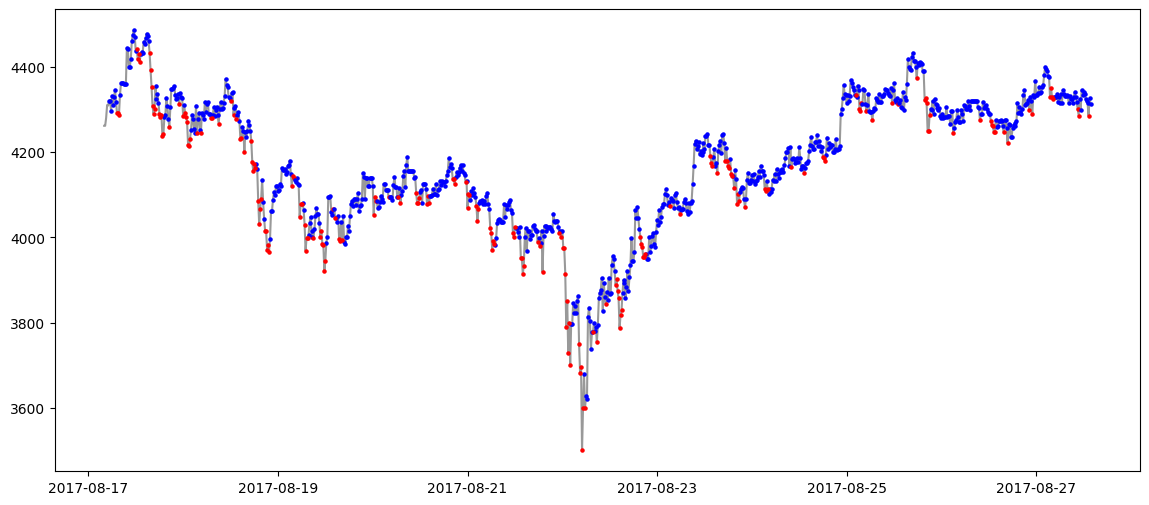

In [140]:
# Dibujar gráfico de dispersión con color que indica la tendencia predicha por KNN

plt.plot(btc["price"], color="#999", zorder=1) # zorder sirve para que la línea (plot) quede debajo de los puntos (scatter)

# Para hacer que el color de cada punto se base en la columna trend
# hay que asignar un color rojo o azul según el valor de la columna trend
# en cada fila.

# Plot the data
for time, row in btc_sorted.iterrows():
    # print(time, row)
    if row['trend'] == "1":
        plt.scatter(time, row['price'], color='blue', s=5, zorder=2)
    else:
        plt.scatter(time, row['price'], color='red', s=5, zorder=2)

plt.show()

### **Resumen**

Hemos utilizado **machine learning supervisado** para clasificar (detectar) tendencias de crypto en cortas ventanas de tiempo (patrones de 1, 2, 3, 4 y 5 pasos).

De este modo es posible detectar y quizá predecir los siguientes movimientos del mercado (bear o bull, bajista o alcista).

**Bear market** es un término de mercado de valores que se refiere a una condición de mercado en la que los precios de las acciones o de los valores son tendencialmente bajos y se espera que disminuyan aún más.

**Bull market** se refiere a una condición de mercado en la que los precios de las acciones o de los valores están tendencialmente al alza y se espera que continúen subiendo.